In [1]:
from facet_ml.classification import cnn
import pandas as pd
import cv2
from facet_ml.segmentation import segmenter
from pathlib import Path
import torch
from torch import nn
from torchvision.models import resnet152

c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [2]:
## Define an image path
image = Path("../../../") / "Images" / "4 nM 1.bmp"

## Open segmenter
seg = segmenter.ImageSegmenter(str(image),segmenter="segment_anything",segmenter_kwargs={"device":"cpu"})

## Use segmenter to get dataset
ds = cnn.ColloidalDataset.from_image_segmenter(seg)

C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\facet_ml\segmentation\features.py:521: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(rotated_x, rotated_y, 2)
C:\Users\Jacob\Desktop\Academi

In [3]:
# Load the model of interest
# model = cnn.UNet(3,3)
model = resnet152()
model.fc = nn.Linear(model.fc.in_features, 3)
model.load_state_dict(torch.load("resnet_classifier.pth"))
model = model.float()

torch.Size([1, 3, 256, 256]) torch.float32
tensor([[-0.5369, -0.6797,  0.6343]], grad_fn=<AddmmBackward0>)


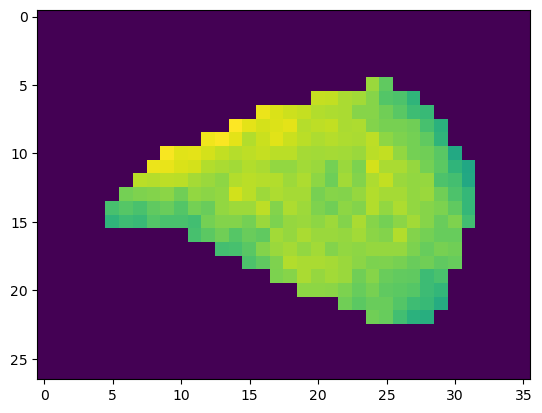

In [10]:
ii=2
input_val = torch.tensor(ds[ii][0])
t = cnn.get_transform(train=False)()
input_tensor = t(input_val).unsqueeze(0)
out = model(input_tensor)
import matplotlib.pyplot as plt
plt.imshow(input_val)
print(out)